**Q2 SVM&LDA**

*采用支持向量机对男女生样本数据中的（身高、体重、50m 成绩、肺活量）共 4 个特征进行分类；  
实现 LDA 算法对前述4个特征进行分类，计算模型预测性能（包含 SE、SP、ACC 和 AUC），   
试分析 LDA 算法如果作为降维技术对于各性能指标的影响。*

`1.导入模块`

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os
import matplotlib.pyplot as plt

`2.处理数据`

In [2]:
def pre_data(file_path):
    data = pd.read_excel(file_path)
    data.dropna(axis=0, how='any', subset=['肺活量'], inplace=True)
    return data

data = pre_data(os.path.join('data', '作业数据_2021合成.xls'))
print (data.shape)


def split(data, train_id, test_id):
    x_train =np.array([data["身高"].iloc[train_id],data["体重"].iloc[train_id],
                data["50米成绩"].iloc[train_id],data["肺活量"].iloc[train_id]], dtype='float32')
    x_test =np.array([data["身高"].iloc[test_id],data["体重"].iloc[test_id],
                data["50米成绩"].iloc[test_id],data["肺活量"].iloc[test_id]], dtype='float32')
    y_train, y_test =np.array(data["性别男1女0"].iloc[train_id]),\
                np.array(data["性别男1女0"].iloc[test_id], dtype='float32')
    x_train=np.transpose(x_train);x_test=np.transpose(x_test)
    return x_train, x_test, y_train, y_test


(350, 13)


`3.评估函数`

In [3]:
def eval(y_pred,y_true,label=1):
    confusion_matrix=metrics.confusion_matrix(y_true,y_pred)
    FP = confusion_matrix .sum(axis=0) - np.diag(confusion_matrix )
    FN = confusion_matrix .sum(axis=1) - np.diag(confusion_matrix )
    TP = np.diag(confusion_matrix )
    TN = confusion_matrix .sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    SE = TP/(TP+FN)   # Sensitivity/ hit rate/ recall/ true positive rate
    SP = TN/(TN+FP)   # Specificity/ true negative rate  SP
    ACC_all=(TP+TN)/(FP+FN+TP+TN)
    return SE[label],SP[label],ACC_all[label],roc_auc_score(y_true,y_pred)

def view(x):
    y = np.mean(x)
    x1 = np.round(x, 4)
    y1 = np.round(y, 4)
    print(x1)
    print ('mean : {}'.format(y1))

`4.SVM分类`

In [4]:
def mySVM(data):
    se_svm = []
    sp_svm = []
    acc_svm = []
    auc_svm = []
    kf = KFold(n_splits = 5,shuffle = True,random_state = None)
    for train_id, test_id in kf.split(data):
        # print("TRAIN:", train_id, "TEST:", test_id)
        x_train, x_test, y_train, y_test = split(data, train_id, test_id)
        svmclf = svm.SVC(kernel='linear', probability=True, random_state=None)
        svmclf.fit(x_train, y_train)
        svm_pred=svmclf.predict(x_test)
        se,sp,acc,auc = eval(svm_pred,y_test)
        se_svm.append(se);sp_svm.append(sp);acc_svm.append(acc);auc_svm.append(auc)
    return se_svm, sp_svm, acc_svm, auc_svm

se_svm, sp_svm, acc_svm, auc_svm = mySVM(data)
print('result of SE、SP、ACC & AUC ')
view(se_svm);view(sp_svm);view(acc_svm);view(auc_svm)

result of SE、SP、ACC & AUC 
[0.9615 1.     0.9828 0.9643 0.9667]
mean : 0.97506
[0.8333 0.7857 0.75   0.7143 1.    ]
mean : 0.8166599999999999
[0.9286 0.9571 0.9429 0.9143 0.9714]
mean : 0.9428599999999999
[0.8974 0.8929 0.8664 0.8393 0.9833]
mean : 0.8958600000000001


`5.LDA分类` 

In [5]:
def myLDA(data,n):
    se_lda = []
    sp_lda = []
    acc_lda = []
    auc_lda = []
    kf = KFold(n_splits = 5,shuffle = True,random_state = None)
    for train_id, test_id in kf.split(data):
        # print("TRAIN:", train_id, "TEST:", test_id)
        x_train, x_test, y_train, y_test = split(data, train_id, test_id)
        lda = LDA(n_components=n)
        lda.fit(x_train, y_train)
        lda_pred=lda.predict(x_test)
        se,sp,acc,auc = eval(lda_pred,y_test)
        se_lda.append(se);sp_lda.append(sp);acc_lda.append(acc);auc_lda.append(auc)
    return se_lda, sp_lda, acc_lda, auc_lda

se_lda, sp_lda, acc_lda, auc_lda = myLDA(data, 1) #一维
print('result of SE、SP、ACC & AUC ')
view(se_lda);view(sp_lda);view(acc_lda);view(auc_lda)


result of SE、SP、ACC & AUC 
[0.9655172413793104, 1.0, 1.0, 0.9807692307692307, 0.9491525423728814]
mean : 0.9790878029042845
[0.75, 1.0, 0.8823529411764706, 0.7222222222222222, 0.7272727272727273]
mean : 0.816369578134284
[0.9285714285714286, 1.0, 0.9714285714285714, 0.9142857142857143, 0.9142857142857143]
mean : 0.9457142857142857
[0.8577586206896552, 1.0, 0.9411764705882353, 0.8514957264957265, 0.8382126348228043]
mean : 0.8977286905192843


`6.LDA降维后svm` 

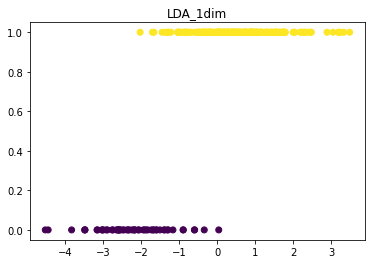

result of SE、SP、ACC & AUC 
[0.9636363636363636, 0.9655172413793104, 0.9827586206896551, 1.0, 0.9821428571428571]
mean : 0.9788110165696372
[0.6, 0.8333333333333334, 0.8333333333333334, 0.8666666666666667, 0.7142857142857143]
mean : 0.7695238095238095
[0.8857142857142857, 0.9428571428571428, 0.9571428571428572, 0.9714285714285714, 0.9285714285714286]
mean : 0.9371428571428572
[0.7818181818181819, 0.899425287356322, 0.9080459770114943, 0.9333333333333333, 0.8482142857142857]
mean : 0.8741674130467235


In [6]:
def myLS(data,n):
    se_ls = []
    sp_ls = []
    acc_ls = []
    auc_ls = []
    kf = KFold(n_splits = 5,shuffle = True,random_state = None)
    for train_id, test_id in kf.split(data):
        # print("TRAIN:", train_id, "TEST:", test_id)
        x_train, x_test, y_train, y_test = split(data, train_id, test_id)  

        lda = LDA(n_components=n)
        lda.fit(x_train, y_train)
        x_train_lda = lda.transform(x_train)
        x_test_lda = lda.transform(x_test)
        svmclf = svm.SVC(kernel='linear', probability=True, random_state=None)
        svmclf.fit(x_train_lda, y_train)
        svm_pred=svmclf.predict(x_test_lda)

        se,sp,acc,auc = eval(svm_pred,y_test)
        se_ls.append(se);sp_ls.append(sp);acc_ls.append(acc);auc_ls.append(auc)
    return x_train_lda, y_train, se_ls, sp_ls, acc_ls, auc_ls

ldaresult, y_train, se_ls, sp_ls, acc_ls, auc_ls = myLS(data, 1)

plt.scatter(ldaresult[:, -1], y_train,marker='o', c=y_train)
plt.title('LDA_1dim')
plt.savefig('./results/LDA_1dim.png')
plt.show()

print('result of SE、SP、ACC & AUC ')
view(se_ls);view(sp_ls);view(acc_ls);view(auc_ls)
